### Dataset Description

- vin: Type String. Vehicle Identification Number is a unique encoded string for every vehicle. Read more at https://www.autocheck.com/vehiclehistory/vin-basics
- back_legroom: Type String. Legroom in the rear seat.
- bed: Type String. Category of bed size(open cargo area) in pickup truck. Null usually means the vehicle isn't a pickup truck
- bed_height: Type String. Height of bed in inches
- bed_length: Type String. Length of bed in inches
- body_type: Type String. Body Type of the vehicle. Like Convertible, Hatchback, Sedan, etc.
- cabin: Type String. Category of cabin size(open cargo area) in pickup truck. Eg: Crew Cab, Extended Cab, etc.
- city: Type String. city where the car is listed. Eg: Houston, San Antonio, etc.
- city_fuel_economy: Type Float. Fuel economy in city traffic in km per litre
- combine_fuel_economy: Type Float. Combined fuel economy is a weighted average of City and Highway fuel economy in km per litre
- daysonmarket: Type Integer. Days since the vehicle was first listed on the website.
- dealer_zip: Type Integer. Zipcode of the dealer
- description: Type String. Vehicle description on the vehicle's listing page
- engine_cylinders: Type String. The engine configuration. Eg: I4, V6, etc.
- engine_displacement: Type Float. engine_displacement is the measure of the cylinder volume swept by all of the pistons of a -  - piston engine, excluding the combustion chambers.
- engine_type: Type String. The engine configuration. Eg: I4, V6, etc.
- exterior_color: Type String. Exterior color of the vehicle, usually a fancy one same as the brochure.
- fleet: Type Boolean. Whether the vehicle was previously part of a fleet.
- frame_damaged: Type Boolean. Whether the vehicle has a damaged frame.
- franchise_dealer: Type Boolean. Whether the dealer is a franchise dealer.
- franchise_make: Type String. The company that owns the franchise.
- front_legroom: Type String. The legroom in inches for the passenger seat
- fuel_tank_volume: Type String. Fuel tank's filling capacity in gallons
- fuel_type: Type String. Dominant type of fuel ingested by the vehicle.
- has_accidents: Type Boolean. Whether the vin has any accidents registered.
- height: Type String. Height of the vehicle in inches
- highway_fuel_economy: Type Float. Fuel economy in highway traffic in km per litre
- horsepower: Type Float. Horsepower is the power produced by an engine.
- interior_color: Type String. Interior color of the vehicle, usually a fancy one same as the brochure.
- isCab: Type Boolean. Whether the vehicle was previously taxi/cab.
- is_certified: Type Boolean. Whether the vehicle is certified. Certified cars are covered through warranty period
- is_cpo: Type Boolean. Pre-owned cars certified by the dealer. Certified vehicles come with a manufacturer warranty for free repairs for a certain time period. Read more at https://www.cartrade.com/blog/2015/auto-guides/pros-and-cons-of-buying-a-certified-pre-owned-car-1235.html
- is_new: Type Boolean. If True means the vehicle was launched less than 2 years ago.
- is_oemcpo: Type Boolean. Pre-owned cars certified by the manufacturer. Read more at https://www.cargurus.com/Cars/articles/know_the_difference_dealership_cpo_vs_manufacturer_cpo
- latitude: Type Float. Latitude from the geolocation of the dealership.
- length: Type String. Length of the vehicle in inches
- listed_date: Type String. The date the vehicle was listed on the website. Does not make days_on_market obsolete. The prices is - days_on_market days after the listed date.
- listing_color: Type String. Dominant color group from the exterior color.
- listing_id: Unique Type Integer. Listing id from the website
- longitude: Type Float. Longitude from the geolocation of the dealership.
- main_picture_url: Type String.

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

# for building linear regression models and preparing data
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option("display.max_columns", 50)
pd.set_option('mode.chained_assignment', None)

### Load Data

Since the dataset contains about 3 million rows, lets select 500 thousands rows so has not to run out of compute resources

In [2]:
df = pd.read_csv("used_cars_data.csv", nrows=500000, low_memory=False)
df.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,...,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,00969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,...,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,00922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      500000 non-null  object 
 1   back_legroom             475891 non-null  object 
 2   bed                      2962 non-null    object 
 3   bed_height               53841 non-null   object 
 4   bed_length               53841 non-null   object 
 5   body_type                497978 non-null  object 
 6   cabin                    8745 non-null    object 
 7   city                     500000 non-null  object 
 8   city_fuel_economy        419864 non-null  float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             500000 non-null  int64  
 11  dealer_zip               500000 non-null  object 
 12  description              486280 non-null  object 
 13  engine_cylinders         485244 non-null  object 
 14  engi

In [4]:
#Check for duplicates
df.duplicated().sum()

0

### Check for missing values

The datset contains so many missing values

In [5]:
(df.isnull().sum()/df.shape[0])*100

vin                      0.0000
back_legroom             4.8218
bed                     99.4076
bed_height              89.2318
bed_length              89.2318
                         ...   
wheel_system             4.4924
wheel_system_display     4.4924
wheelbase                4.8218
width                    4.8218
year                     0.0000
Length: 66, dtype: float64

### Delete columns containing more than 30% null values

In [6]:
thresh =  int(((100-30)/100)*df.shape[0] + 1)
cars_df = df.dropna(axis=1, thresh=thresh)

print(f"The columns with {30}% or more null values are: {list(df.columns[df.isna().sum()/df.shape[0]*100 > 30])}")

The columns with 30% or more null values are: ['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy', 'fleet', 'frame_damaged', 'has_accidents', 'isCab', 'is_certified', 'is_cpo', 'is_oemcpo', 'owner_count', 'salvage', 'theft_title', 'vehicle_damage_category']


Lets also drop columns that will not be useful for analysis and building the machine learning model

In [7]:
cols = ["vin", "dealer_zip", "description","latitude", "listed_date", "listing_id", "longitude", "savings_amount",\
       "main_picture_url", "sp_id", "sp_name", "trimId", "trim_name", "seller_rating", "year", "city", "interior_color", "exterior_color",\
        "wheel_system_display", "transmission_display", "franchise_dealer", "listing_color", "major_options"]

cars_df.drop(cols, axis=1, inplace=True);

In [8]:
cars_df.head(3)

,back_legroom,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,franchise_make,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,is_new,length,make_name,maximum_seating,mileage,model_name,power,price,torque,transmission,wheel_system,wheelbase,width
0,35.1 in,SUV / Crossover,NaN,522,I4,1300.0,I4,Jeep,41.2 in,12.7 gal,Gasoline,66.5 in,NaN,177.0,True,166.6 in,Jeep,5 seats,7.0,Renegade,"177 hp @ 5,750 RPM",23141.0,"200 lb-ft @ 1,750 RPM",A,FWD,101.2 in,79.6 in
1,38.1 in,SUV / Crossover,NaN,207,I4,2000.0,I4,Land Rover,39.1 in,17.7 gal,Gasoline,68 in,NaN,246.0,True,181 in,Land Rover,7 seats,8.0,Discovery Sport,"246 hp @ 5,500 RPM",46500.0,"269 lb-ft @ 1,400 RPM",A,AWD,107.9 in,85.6 in
2,35.4 in,Sedan,17.0,1233,H4,2500.0,H4,FIAT,43.3 in,15.9 gal,Gasoline,58.1 in,23.0,305.0,False,180.9 in,Subaru,5 seats,NaN,WRX STI,"305 hp @ 6,000 RPM",46995.0,"290 lb-ft @ 4,000 RPM",M,AWD,104.3 in,78.9 in


From the data above , we can see the following columns `back_legroom, front_legroom, fuel_tank_volumn, length, wheelbase and width` contain measument units and are in the wrong formats. Let's first remove the unit of measurement from the data. Then convert any special characters into a null value so that we can easily fill in the null values with the average value.

### Data Preprocessing

In [9]:
cols = ["back_legroom", "front_legroom", "fuel_tank_volume", "length", "wheelbase", "width",\
       "height", "power", "maximum_seating", "torque"]

for col_name in cols:
    try:

        # splitting the back_legroom column and returning only the numeric values.
        cars_df[col_name] = cars_df[col_name].str.split(' ').str[0]

        # replacing the "--" with NaN values
        cars_df[col_name].replace('--', np.nan , inplace=True)

        # converting the column to a float
        cars_df[col_name] = pd.to_numeric(cars_df[col_name], downcast='float')
    except ValueError:
        pass


### Fill missing categorical values
Lets fill all the categorical columns with thier modes

In [10]:
#Select all categorical columns and calculate their missing value percentage
categorical_cols = cars_df.select_dtypes("object").isna().sum()/cars_df.shape[0]*100
# selecting categorical columns with missing values
catCols_with_nan = cars_df.select_dtypes("object").columns[categorical_cols > 0].to_list()

In [11]:
catCols_with_nan

['body_type',
 'engine_cylinders',
 'engine_type',
 'franchise_make',
 'fuel_type',
 'transmission',
 'wheel_system']

In [12]:
for col in catCols_with_nan:
    cars_df[col].fillna(cars_df[col].mode()[0], inplace=True)

In [13]:
cars_df.select_dtypes("object").isna().sum()

body_type           0
engine_cylinders    0
engine_type         0
franchise_make      0
fuel_type           0
make_name           0
model_name          0
transmission        0
wheel_system        0
dtype: int64

### Fill missing numerical columns

In [14]:
#Select all numerical columns and calculate their missing value percentage
numerical_cols = cars_df.select_dtypes(["float32", "float64", "int64"]).isna().sum()/cars_df.shape[0]*100
#Select only the columns with missing values
numCols_with_nan = cars_df.select_dtypes(["float32", "float64", "int64"]).columns[numerical_cols > 0].to_list()

In [15]:
for col in numCols_with_nan:
    cars_df[col].fillna(cars_df[col].median(), inplace=True)

In [16]:
cars_df.select_dtypes(["float32", "float64", "int64"]).isnull().sum()

back_legroom            0
city_fuel_economy       0
daysonmarket            0
engine_displacement     0
front_legroom           0
fuel_tank_volume        0
height                  0
highway_fuel_economy    0
horsepower              0
length                  0
maximum_seating         0
mileage                 0
power                   0
price                   0
torque                  0
wheelbase               0
width                   0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_18164\3131759686.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = cars_df.corr()


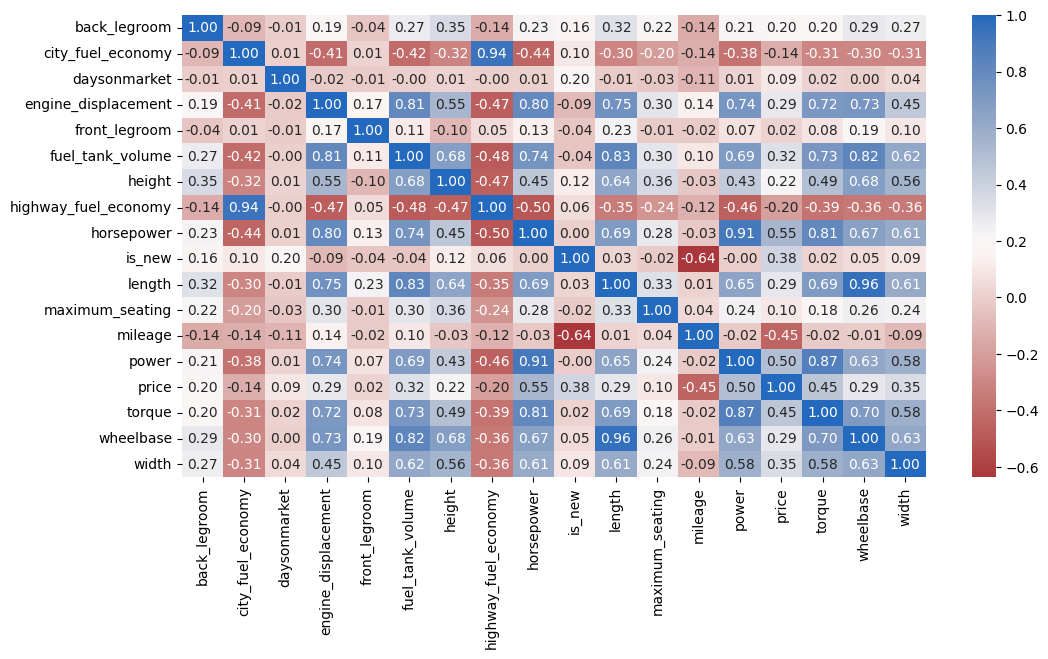

In [17]:
plt.figure(figsize=(12, 6))
df_corr = cars_df.corr()
sns.heatmap(df_corr, fmt =".2f", annot=True, cmap="vlag_r");
# plt.savefig("heatmap")

In [18]:
cars_df.drop(["is_new", "maximum_seating", "front_legroom", "highway_fuel_economy", "city_fuel_economy"], axis=1, inplace=True)

### Encode categorical variables

In [19]:
copied_df = cars_df.copy()
for i in cars_df.select_dtypes(["object", "bool"]):
    le = LabelEncoder()
    copied_df[i] = le.fit_transform(copied_df[i])
#     if i in ['wheel_system']:
#         print(i)
#         print(list(copied_df[i].unique()))
#         print(list(le.inverse_transform(copied_df[i].unique())))
#         print("")

### Splitting Dataset

In [20]:
#extract features and labels
features = copied_df.drop("price", axis=1)
price = copied_df['price']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=42)

In [22]:
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (400000, 21)
the shape of the training set (target) is: (400000,)

the shape of the test set (input) is: (100000, 21)
the shape of the test set (target) is: (100000,)


### Feature scaling

It is usually a good idea to perform feature scaling to help your model converge faster. This is especially true if your input features have widely different ranges of values.

For this, we will use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class from scikit-learn. This computes the z-score of your inputs. The z-score is given by the equation:

$$ z = \frac{x - \mu}{\sigma} $$

where $\mu$ is the mean of the feature values and $\sigma$ is the standard deviation. The code below shows how to prepare the training set using the said class.

In [23]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

# Scale the cross validation set using the mean and standard deviation of the training set
X_test_scaled = scaler_linear.transform(x_test)

## Modelling 

In other to build the machine learning models, we will try out three different models which includes:

- Linear Regression
- Decision Tree Regressor
- Gradient Bosting Regressor

In [24]:
def evalaute(model, x_train, x_test, y_train, y_test):
    """
    Function that returns the performance of a model
    """
    #calcuate the mean squared error
    train_rmse = round(np.sqrt(mean_squared_error(y_train, model.predict(x_train))), 2)
    test_rmse = round(np.sqrt(mean_squared_error(y_test, model.predict(x_test))), 2)
    
    #calulate the mean absolute error
    train_mae = round(mean_absolute_error(y_train, model.predict(x_train)), 2)
    test_mae = round(mean_absolute_error(y_test, model.predict(x_test)), 2)
    
    r2 = r2_score(y_test, model.predict(x_test))
    print("Model Performance")
    metrics = pd.DataFrame({
        "Train RMSE" : [train_rmse],
        "Test RMSE": [train_rmse],
        "Train MAE": [train_mae],
        "Test MAE":[test_mae],
        "R2 Score":[r2]
    })
    print("-------------------------------------------------------")
    print(metrics)
    print("-------------------------------------------------------")
    print("Price Comparisons")
    print("-------------------------------------------------------")
    
    df = pd.DataFrame(
    {
        "Actual Price":y_test,
        "Predicted Price": model.predict(x_test)
    }).reset_index(drop=True)
    
    print(df.head(10))

### Linear Regression Model

In [25]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

In [26]:
evalaute(linear_model, X_train_scaled, X_test_scaled, y_train, y_test)

Model Performance
-------------------------------------------------------
   Train RMSE  Test RMSE  Train MAE  Test MAE  R2 Score
0    14341.26   14341.26    6727.94   6679.03  0.602261
-------------------------------------------------------
Price Comparisons
-------------------------------------------------------
   Actual Price  Predicted Price
0       44427.0     37843.739494
1       43900.0     55863.802170
2       23749.0     21206.628693
3       19808.0     19103.438159
4       31050.0     40304.334194
5       16000.0     21366.977758
6       42960.0     38055.833536
7       51551.0     48246.162003
8       21500.0     23710.066347
9       67998.0     65278.390223


### DecisionTree Regressor

In [27]:
DT = DecisionTreeRegressor()

DT.fit(X_train_scaled, y_train);

In [28]:
evalaute(DT, X_train_scaled, X_test_scaled, y_train, y_test)

Model Performance
-------------------------------------------------------
   Train RMSE  Test RMSE  Train MAE  Test MAE  R2 Score
0     1231.27    1231.27     364.04   3002.09  0.819555
-------------------------------------------------------
Price Comparisons
-------------------------------------------------------
   Actual Price  Predicted Price
0       44427.0          42730.0
1       43900.0          43900.0
2       23749.0          23204.2
3       19808.0          20720.0
4       31050.0          31775.0
5       16000.0          16172.0
6       42960.0          35125.0
7       51551.0          47998.0
8       21500.0          18500.0
9       67998.0          69900.0


### Gradient Boosting Regressor

In [29]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [30]:
#evaluue the performance of the gradien regressor
evalaute(GBR, X_train_scaled, X_test_scaled, y_train, y_test)

Model Performance
-------------------------------------------------------
   Train RMSE  Test RMSE  Train MAE  Test MAE  R2 Score
0     9715.65    9715.65    4279.53   4237.95  0.858858
-------------------------------------------------------
Price Comparisons
-------------------------------------------------------
   Actual Price  Predicted Price
0       44427.0     43307.378331
1       43900.0     44514.216562
2       23749.0     23586.541773
3       19808.0     20863.461629
4       31050.0     40747.891442
5       16000.0     22709.704126
6       42960.0     41143.958946
7       51551.0     45281.148166
8       21500.0     18585.598516
9       67998.0     78877.808475


### Feature Importance

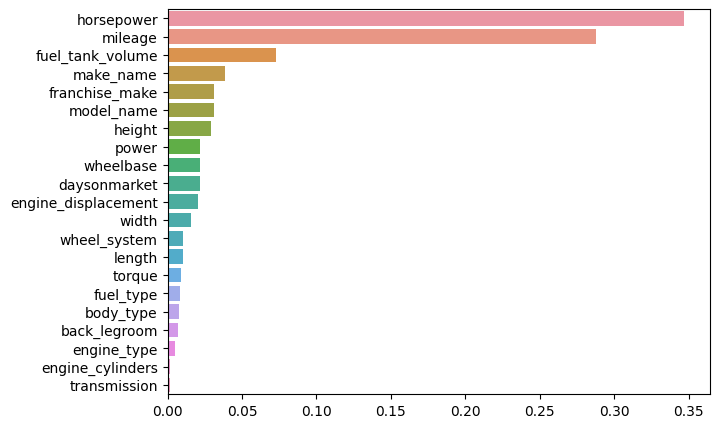

In [31]:
plt.figure(figsize=(7,5))
# get feature importance
feature_importance = pd.Series(DT.feature_importances_, index=x_train.columns)
sns.barplot(y=feature_importance.nlargest(27).index, x=feature_importance.nlargest(27), orient="h")
plt.savefig("importance")

In [32]:
# Get names of top 12 features
indices = np.argsort(feature_importance)[::-1]
names = [x_train.columns[i] for i in indices][:12]
names

['horsepower',
 'mileage',
 'fuel_tank_volume',
 'make_name',
 'franchise_make',
 'model_name',
 'height',
 'power',
 'wheelbase',
 'daysonmarket',
 'engine_displacement',
 'width']

### Retrain model on the top 12 features

In [33]:
x_train_new = x_train[names]
x_test_new = x_test[names]

In [34]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_new_scaled = scaler_linear.fit_transform(x_train_new)

# Scale the cross validation set using the mean and standard deviation of the training set
X_test_new_scaled = scaler_linear.transform(x_test_new)

save the scaler to transform new datapoints

In [35]:
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler_linear, f)

In [36]:
DT_new = DecisionTreeRegressor()
DT_new.fit(X_train_new_scaled, y_train)

DecisionTreeRegressor()

In [37]:
evalaute(DT_new, X_train_new_scaled, X_test_new_scaled, y_train, y_test)

Model Performance
-------------------------------------------------------
   Train RMSE  Test RMSE  Train MAE  Test MAE  R2 Score
0     1280.09    1280.09     390.11   3143.16  0.295352
-------------------------------------------------------
Price Comparisons
-------------------------------------------------------
   Actual Price  Predicted Price
0       44427.0          43223.5
1       43900.0          47999.0
2       23749.0          23204.2
3       19808.0          20750.0
4       31050.0          31775.0
5       16000.0          19487.0
6       42960.0          30751.5
7       51551.0          47998.0
8       21500.0          20999.0
9       67998.0          69900.0


### Retrain Gradient Boosting Model

In [38]:
GBR_new = GradientBoostingRegressor()
GBR_new.fit(X_train_new_scaled, y_train)

GradientBoostingRegressor()

In [39]:
evalaute(GBR_new, X_train_new_scaled, X_test_new_scaled, y_train, y_test)

Model Performance
-------------------------------------------------------
   Train RMSE  Test RMSE  Train MAE  Test MAE  R2 Score
0    10096.31   10096.31    4494.62   4455.37  0.839694
-------------------------------------------------------
Price Comparisons
-------------------------------------------------------
   Actual Price  Predicted Price
0       44427.0     42351.005947
1       43900.0     48449.755768
2       23749.0     24271.431736
3       19808.0     21212.897528
4       31050.0     40068.357058
5       16000.0     23390.722278
6       42960.0     42019.234979
7       51551.0     44028.993364
8       21500.0     20007.401175
9       67998.0     82048.754363


### Save Model

In [40]:
with open("DT_model.pkl", "wb") as f:
    pickle.dump(DT_new, f)
    
with open("GBR_model.pkl", "wb") as f:
    pickle.dump(GBR_new, f)